# Numerical tests for the Landlab GravelBedrockEroder Component

*B.C. Campforts, INSTAAR, University of Colorado Boulder* \
*V. Gabel, CIRES and Department of Geological Sciences, University of Colorado Boulder* \
*G.E. Tucker, CIRES and Department of Geological Sciences, University of Colorado Boulder* 

This notebook describes a series of experiments to test the `GravelBedrockEroder` component. 

# A. Analytical solutions 

## 1. Plucking

Mathematically, plucking is represented as: 

$$ E_p = a(\tau -\tau_c)^{\frac{3}{2}} e^{\frac{-H}{H_*}}$$
Following near threshold theory this becomes: 
$$ E_p = a(\epsilon\tau_c)^{\frac{3}{2}} e^{\frac{-H}{H_*}}$$

$$ E_p = a\left(\epsilon\theta_c(\sigma -\rho)gD_{50}\right)^{\frac{3}{2}} e^{\frac{-H}{H_*}}$$

From rate into Volume: 
$$ V_p = E_pbΔx $$
where *b* is river width and: 
$$ b = \frac{k_wQS^{\frac{7}{6}}}{D_{50}^{\frac{3}{2}}}$$

$$ V_p = \frac{a(\epsilon\theta_c(\sigma -\rho)gD_{50})^{\frac{3}{2}} e^{\frac{-H}{H_*}}k_wQS^{\frac{7}{6}}Δx}{D_{50}^{\frac{3}{2}}} $$

Where $a(\epsilon\theta_c(\sigma -\rho)g)^{\frac{3}{2}}k_w$ is a constant *K_p* and average channel incision rate, corrected for numerical cell width equals:  

$$  E̅_p̅ = \frac{V_p}{Δx^2} = \frac{K_pQS^{\frac{7}{6}}e^{\frac{-H}{H_*}}}{Δx}$$

How to deal with cell width ($Δx$) of irregular grids?

Rewrite $\frac{1}{Δx}$ as: $\frac{\lambda}{A_{cell}}$

where *$\lambda$* is the length of the link. Average channel incision rate can therefore be written as: 
$$  E̅_p̅ = \frac{K_pQS^{\frac{7}{6}}e^{\frac{-H}{H_*}}\lambda}{A_{cell}}$$

### 1.1 Analytical solution for plucking only case in 1D (single threaded river channel) 
#### Case 1: plucking where all sediment is evacuated as wash load 

Under steady state, we can write: 

$$ U = \frac{K_pQS^{\frac{7}{6}}\alpha}{Δx}$$

where $\alpha$ represents the sediment buffering effect as $ \alpha = e^{\frac{-H}{H_*}}$. $\alpha$ equals 1 when sediment thickness $H=0$. 

Isolating S gives: 

$$S^{\frac{7}{6}} = \frac{UΔx}{K_pQ}$$

$Q$ can be written as $rA$ so that: 

$$ S =  \left(\frac{UΔx}{K_prA}\right)^{\frac{6}{7}} $$


#### Case 2: plucking where sediment is conserved

We can write the change in sediment thickness ($H$) over time as: 

$$ \frac{\partial H}{\partial t} = \frac{K_pQS^{\frac{7}{6}}\alpha}{Δx} - \frac{1}{Δx} \frac{\partial Q_s}{\partial x}$$

where $\alpha$ represents the sediment buffering effect as $ \alpha = e^{\frac{-H}{H_*}}$. 

Under steady state, we have $ \frac{\partial H}{\partial t} = 0 $ from which it follows: 

$$ \frac{\partial Q_s}{\partial x} = K_pQS^{\frac{7}{6}}\alpha $$

Integrating over $x$ and with $Q_s = 0$ at $x = 0$ gives:

$$Q_s =  K_pQS^{\frac{7}{6}}\alpha x $$

We also know that at steady state, $Q_s = UA$ from which it follows: 

$$ UA = K_pQS^{\frac{7}{6}}\alpha x $$

with $Q = rA$ we get: 

$$ \alpha = \frac{U}{K_prS^{\frac{7}{6}}x} $$

The transport equation for sediment gives: 
$$ Q_s = K_Q I QS^{\frac{7}{6}} (1 -\alpha)$$
where $K_Q$ is the transport coefficient and $I$ is the intermittency factor.

Combination of the two expression for $Q_s$ gives: 

$$ K_Q I QS^{\frac{7}{6}} (1 -\alpha) = K_pQS^{\frac{7}{6}}\alpha x $$

isolating $\alpha$ gives: 

$$\frac{\alpha}{1 -\alpha} =  \frac{K_Q I} {K_px} $$

or: 

$$\frac{1 -\alpha}{\alpha} = \frac{1}{\alpha} -1 = \frac{K_px} {K_Q I}  $$

from which it follows: 

$$ \frac{1}{\alpha}  = \frac{K_px} {K_Q I}  +1 $$

When combining this expression with the earlier derived expression for $\alpha$ we get: 

$$ \frac{K_prS^{\frac{7}{6}}x}{U}=  \frac{K_px} {K_Q I}  +1$$

Isolating S gives: 

$$ S = \left(\frac{U}{r} \left(\frac{1}{K_Q I} + \frac{1}{K_px}\right) \right)^{\frac{6}{7}} $$

or: 

$$ S = \left(\frac{U}{rK_Q I} \left(1 + \frac{K_Q I}{K_px}\right) \right)^{\frac{6}{7}} $$

### 1.2 Analytical solution for plucking only case in 2D (full-scale landscape) 
#### Case 1: plucking where all sediment is evacuated as wash load 
Under steady state, we can write: 

$$ U = \frac{K_pQS^{\frac{7}{6}}\alpha}{Δx}$$

where $\alpha$ represents the sediment buffering effect as $ \alpha = e^{\frac{-H}{H_*}}$. $\alpha$ equals 1 when sediment thickness $H=0$. 

Isolating S gives: 

$$S^{\frac{7}{6}} = \frac{UΔx}{K_pQ}$$

$Q$ can be written as $rA$ so that: 

$$ S =  \left(\frac{UΔx}{K_prA}\right)^{\frac{6}{7}} $$

#### Case 2: plucking where sediment is conserved


We can write the change in sediment thickness ($H$) over time as: 

$$ \frac{\partial H}{\partial t} = \frac{K_pQS^{\frac{7}{6}}\alpha}{Δx} - \frac{\partial Q_s}{\partial A}$$

where $\alpha$ represents the sediment buffering effect as $ \alpha = e^{\frac{-H}{H_*}}$. 

Under steady state, we have $ \frac{\partial H}{\partial t} = 0 $ from which it follows: 

$$ \frac{\partial Q_s}{\partial A} = \frac{K_pQS^{\frac{7}{6}}}{Δx}\alpha $$

Integrating over $x$ and with $Q_s = 0$ at $x = 0$ gives:

$$Q_s =  \frac{K_pQS^{\frac{7}{6}}}{Δx}\alpha A $$

We also know that at steady state, $Q_s = UA$ from which it follows: 

$$ UA = \frac{K_pQS^{\frac{7}{6}}}{Δx}\alpha A $$

with $Q = rA$ we get: 

$$ \alpha = \frac{UΔx}{K_prS^{\frac{7}{6}}} $$


The transport equation for sediment gives: 
$$ Q_s = K_Q I QS^{\frac{7}{6}} (1 -\alpha)$$
where $K_Q$ is the transport coefficient and $I$ is the intermittency factor.

Combination of the two expression for $Q_s$ gives: 

$$ K_Q I QS^{\frac{7}{6}} (1 -\alpha) =  \frac{K_pQS^{\frac{7}{6}}}{Δx}\alpha A  $$

isolating $\alpha$ gives: 

$$\frac{\alpha}{1 -\alpha} =  \frac{K_Q I QS^{\frac{7}{6}}} {\frac{K_pQS^{\frac{7}{6}}}{Δx}A} $$

or: 


$$\frac{\alpha}{1 -\alpha} =  \frac{K_Q I Δx} {K_pA} $$

rewriting to isolate $\alpha$ gives: 

$$\frac{1 -\alpha}{\alpha} = \frac{1}{\alpha} -1 = \frac{K_pA} {K_Q I Δx}  $$

from which it follows: 

$$ \frac{1}{\alpha}  = \frac{K_pA} {K_Q I Δx} +1 $$

When combining this expression with the earlier derived expression for $\alpha$ we get: 

$$ \frac{K_prS^{\frac{7}{6}}}{UΔx}=  \frac{K_pA} {K_Q I Δx} +1$$

Isolating S gives: 

$$ S = \left(\frac{U}{r} \left(\frac{1}{K_Q I} + \frac{Δx}{K_pA}\right) \right)^{\frac{6}{7}} $$


## 2. Sediment transport and abrasion

If no bedrock plucking or abrasion occurs, the Gravel Bedrock Eroder simulates a network of gravel-bed alluvial channels. Mathematically, abrasion is represented as $\beta Q_s$. The solution breaks down into two cases: one where no abrasion takes place along the channel ($\beta = 0$) and one where sediment abrasion occurs along the channel($\beta > 0$). Checkout the notebook on the gravel sediment transporter for detailed derivations. 


### Case 1: sediment transport and no abrasion
Under steady state and when no abrasion or plucking takes place, we get: 

$${S = \left( \frac{\psi (1-\phi_s) E}{\beta k_Q I r x}(1 - e^{-\beta x})\right)^{6/7}}$$

where $\psi$ is the fraction of entrained material that is of gravel size and $\phi_s$ is the porosity of the substrate into which the valley lowers through time. $k_Q$ is a dimensionless transport efficiency factor equal to $\approx 0.041$. The variable $I$ is an efficiency factor, defined as the fraction of time that bankfull discharge occurs.

### Case 2: sediment transport and general case of abrasion

Under steady state and when no abrasion or plucking takes place, we get: 

$$Q_s = \frac{\psi (1-\phi_s) E \Delta y}{\beta} (1 - e^{-\beta x})$$

from which we can derive: 

$$S = \left( \frac{\psi (1-\phi_s) E}{\beta k_Q I r x}(1 - e^{-\beta x})\right)^{6/7}$$

## 3. Abrasion and plucking

### 3.1 Analytical solution along river profile (1D)

#### Part 1: derive mass balance for sediment thickness $H$

$$\frac{\partial H}{\partial t} =  \frac{K_pQS^{\frac{7}{6}}\alpha}{Δx} - \frac{1}{Δx}\frac{\partial Q_s}{\partial x} - \frac{\beta Q_s}{Δx}$$

where $\alpha$ represents the sediment buffering effect as $ \alpha = e^{\frac{-H}{H_*}}$. $\alpha$ equals 1 when sediment thickness $H=0$. 

Under stead state, we get $\frac{\partial H}{\partial t}=0$:

$$0 = K_pQS^{\frac{7}{6}}\alpha- \frac{\partial Q_s}{\partial x} - \beta Q_s$$

or: 

$$\frac{\partial Q_s}{\partial x} = K_pQS^{\frac{7}{6}}\alpha - \beta Q_s$$

Let's use the method of substitution to do some integration magic: 

To integrate this for the general case of $\beta > 0$, we can use the method of substitution. Let $v = K_pQS^{\frac{7}{6}}\alpha$, and $w = v - \beta Q_s$. Then $dw = -\beta dQ_s$, so that $dQ_s = -(1/\beta) dw$. 

At the head of the reach $x=0$, and sediment discharge equals zero: $Q_s=0$. Therefore, when $x=0$, $w=v$.

Substituting these,

$$-\frac{1}{\beta} \frac{dw}{dx} = w$$

$$\frac{1}{w}dw = -\beta dx$$

Integrating from $w = v$ to $w$ and from $x = 0$ to $x$,

$$\ln(w) - \ln(x) = -\beta x$$

$$\ln\left(\frac{w}{v}\right) = -\beta x$$

$$\frac{w}{v} = e^{-\beta x}$$

Substitute $w$ back in: 

$$\frac{v - \beta Q_s}{v} = e^{-\beta x}$$

$$1 - \frac{\beta Q_s}{v} = e^{-\beta x}$$

$$\beta Q_s = v (1 - e^{-\beta x})$$

Substitute $v$ back in: 

$$Q_s = \frac{K_pQS^{\frac{7}{6}}\alpha(1 - e^{-\beta x})}{\beta}$$


#### Part 2: derive mass balance for bedrock $\eta$

$$ \frac{\partial m}{\partial t} = M_{in} - M_{out} $$
where m is the mass of a volume of rock, which can be written as $\rho_r ΔxΔy \frac{\partial \eta}{\partial t}$. From this, we get: 
$$\frac{\partial m}{\partial t} = \rho_r ΔxΔy \frac{\partial \eta}{\partial t} = U\rho_r ΔxΔy- \rho_r \frac{Pw}{Δy}Δx-\frac{\rho_r \beta Q_s Δx}{Δy}$$

where $P$ is a plucking rate and $w$ is the width over which the plucking is exerted. We also know (Eq. 16 Wickert and Schildgen): 

$$ w = k_w QS^{7/6}{D_{50}} $$

so that: 

$$\frac{\partial \eta}{\partial t} = U-  \frac{PK_wQS^{7/6}\alpha}{D_{50}^{3/2}Δy}-\frac{\beta Q_s \alpha}{Δy}$$

or with $K_p = \frac{PK_w}{D_{50}^{3/2}}$: 

$$\frac{\partial \eta}{\partial t} = U-  \frac{K_pQS^{7/6}\alpha}{Δy}-\frac{\beta Q_s \alpha}{Δy}$$

Under stead state, we get $\frac{\partial \eta}{\partial t} =0$:


$$\frac{\beta Q_s \alpha}{Δy} =U-  \frac{K_pQS^{7/6}\alpha}{Δy}$$

$$Q_s=\frac{U Δy} {\beta \alpha}-  \frac{K_pQS^{7/6}}{\beta}$$
#### Part 3: Sediment transport equation

The transport equation for sediment gives: 
$$ Q_s = K_Q I QS^{7/6} (1 -\alpha)$$
where $K_Q$ is the transport coefficient and $I$ is the intermittency factor.

#### Part 4: Combine all pieces

Combination of the transport equation (part 3) and sediment thickness mass conservation (part 1) gives: 

$$ K_Q I QS^{7/6} (1 -\alpha) = \frac{K_pQS^{7/6}\alpha(1 - e^{-\beta x})}{\beta}$$

$$ K_Q I (1 -\alpha) = \frac{K_p\alpha(1 - e^{-\beta x})}{\beta}$$

$$ \frac{1 -\alpha}{\alpha} = \frac{K_p(1 - e^{-\beta x})}{\beta K_Q I }$$

$$ \frac{1}{\alpha} = \frac{K_p(1 - e^{-\beta x})}{\beta K_Q I } +1$$

$$ \alpha = \frac{\beta K_Q I }{K_p(1 - e^{-\beta x})+\beta K_Q I } $$

Combination of the sediment thickness mass conservation (part 1)  and bedrock mass conservation (part 2) further gives: 

$$  \frac{K_pQS^{7/6}\alpha(1 - e^{-\beta x})}{\beta} = \frac{U Δy} {\beta \alpha}-  \frac{K_pQS^{7/6}}{\beta}$$

Assuming here Δx = Δy:

$$  K_pQS^{7/6}\alpha(1 - e^{-\beta x})= \frac{U Δx}{\alpha} - K_pQS^{7/6} $$

From which we get: 

$$K_pQS^{7/6}\alpha(1 - e^{-\beta x})+ K_pQS^{7/6} = \frac{U Δx}{\alpha} $$

$$S^{7/6} (K_pQ\alpha(1 - e^{-\beta x})+ K_pQ) = \frac{U Δx}{\alpha} $$

$$S  = \left(\frac{U Δx}{\alpha (K_pQ\alpha(1 - e^{-\beta x})+ K_pQ)}\right)^{6/7} $$

Plugging in $\alpha$ gives: 

$$S  = \left(\frac{U Δx}{\frac{\beta K_Q I }{K_p(1 - e^{-\beta x})+\beta K_Q I } (K_pQ\frac{\beta K_Q I }{K_p(1 - e^{-\beta x})+\beta K_Q I } (1 - e^{-\beta x})+ K_pQ)}\right)^{6/7} $$

# B. Numerical solutions

Import packages

In [1]:
import numpy as np
from landlab.components import FlowAccumulator, GravelBedrockEroder
from landlab.plot import imshow_grid
from matplotlib import pyplot as plt
from landlab import RasterModelGrid

Create general model run

In [2]:
def run_model(
    nr=3,
    nc=50,
    dx=500,
    dt=500,
    totT = 2e7,
    U=1e-4,
    coarse_fraction_from_plucking=0.0,
    intermittency_factor=0.03,
    runoff_rate=10.0,
    plucking_coefficient=1e-6,
    transport_coefficient=0.041,
    abrasion_coefficient=0.0,
    sediment_porosity=0.1,
    depth_decay_scale=0.5,
    single_outlet=True,
    uplift = 'bedrock'
):

    grid = RasterModelGrid((nr, nc), xy_spacing=dx)
    elev = grid.add_zeros("topographic__elevation", at="node")
    rock_elev = grid.add_zeros("bedrock__elevation", at="node")
    sed = grid.add_zeros("soil__depth", at="node")
    sed[grid.core_nodes] = 0
    if single_outlet:
        grid.set_closed_boundaries_at_grid_edges(True, True, False, True)
    else:
        grid.set_closed_boundaries_at_grid_edges(False, False, False, False)

    fa = FlowAccumulator(grid, runoff_rate=runoff_rate)
    fa.run_one_step()
    # TODO Check porosity in deposition (Building walls)

    eroder = GravelBedrockEroder(
        grid,
        abrasion_coefficient=abrasion_coefficient,
        plucking_coefficient=plucking_coefficient,
        intermittency_factor=intermittency_factor,
        transport_coefficient=transport_coefficient,
        sediment_porosity=sediment_porosity,
        depth_decay_scale=depth_decay_scale,
        coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    )

    
    iterations = int(totT / dt)

    # Run model
    for ii in range(iterations):
        if uplift =='bedrock':
            rock_elev[grid.core_nodes] += U * dt
        elif uplift =='sediment':             
            sed[grid.core_nodes] += U * dt
        elev[grid.core_nodes] += U * dt
        fa.run_one_step()
        eroder.run_one_step(dt)
        if np.mod(ii, 10000) == 0:
            # plt.figure(fig);
            # imshow_grid(grid, 'topographic__elevation', plot_name='topographic__elevation',color_for_closed = 'white');
            # plt.title(ii/iterations)
            # plt.show();
            print("%.02f percent of model run completed" % (ii / iterations))
    return grid

Create plotting functions: one for 1D plots, one for 2D plots. The analytical solutions are calculated within these plotting functions. 

In [3]:
def plot_model_results(
    grid,
    nc,
    U,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
    abrasion_coefficient=0,
    sediment_porosity = 0, 
    analytical_solution="plucking",
):

    elev = grid.at_node["topographic__elevation"]
    rock_elev = grid.at_node["bedrock__elevation"]
    sed = grid.at_node["soil__depth"]

    plt.plot(
        grid.x_of_node[nc : nc + nc - 1], elev[nc : nc + nc - 1], label="Elevation"
    )
    plt.plot(
        grid.x_of_node[nc : nc + nc - 1], rock_elev[nc : nc + nc - 1], label="Bedrock"
    )
    plt.plot(grid.x_of_node[nc : nc + nc - 1], sed[nc : nc + nc - 1], label="soil")
    plt.legend()
    plt.xlabel("Distance from mouth, m")
    plt.ylabel("Elevation, m")

    slope = grid.at_node["topographic__steepest_slope"]
    k_qs = transport_coefficient  # (density*shield*stress*epsilon (1.2)), Eq. 8 Wickert and Schildgen
    I = intermittency_factor
    r = runoff_rate
    K = plucking_coefficient
    beta = abrasion_coefficient
    x = grid.x_of_node[nc + 1 : nc + nc - 1]
    A = np.flip(grid.at_node["drainage_area"][nc + 1 : nc + nc - 1])
    slope_n = np.flip(slope[nc + 1 : nc + nc - 1])

    U = uplift_rate
    Q = r * A

    if analytical_solution == "plucking":
        if coarse_fraction_from_plucking == 0:
            S_an = (U / (K * x * r)) ** (6 / 7)
        else:
            S_an = (U / (k_qs * I * r) * (1 + (k_qs * I) / (K * x))) ** (6 / 7)
    if analytical_solution == 'sediment':
        psi = 1    
        phi = sediment_porosity
        S_an = ((psi *(1-phi)*U)/(k_qs*I*r))**(6/7)
        #Analytical solution is constant slope: 
        S_an = np.ones_like(x) * S_an
    elif analytical_solution == 'sediment_abrasion':
        psi = 1    
        phi = sediment_porosity
        S_an = ((psi *(1-phi)*U)/(beta*k_qs*I*r*x) * (1-np.exp(-beta*x)))**(6/7)
        
    elif analytical_solution == "plucking_and_abrasion":
        # TODO: insert psi and phi in solutions
        A1 = beta * k_qs * I
        A2 = (1 - np.exp(-beta * x)) * K
        A3 = beta * k_qs * I

        alpha = A1 / (A2 + A3)

        term_1 = 1 - np.exp(-beta * x)
        term_2 = K * Q * alpha
        term_3 = term_1 * term_2 + K * Q
        term_4 = (U * dx) / alpha

        S_an = (term_4 / term_3) ** (6 / 7)

    plt.figure()
    plt.plot(
        x,
        slope_n,
        label="slope",
        color="black",
        linewidth=3,
    )
    plt.plot(x, (S_an), label="analytical slope", color="red")
    plt.legend()
    plt.xlabel("Distance from source, m")
    plt.ylabel("Slope, m/m")

    plt.figure()
    plt.plot(x, np.flip(elev[nc + 1 : nc + nc - 1]), color="black", label="Elevation")
    # elev_an =np.append([0],np.cumsum(np.flip(S_an2)*dx))
    elev_an = np.cumsum(np.flip(S_an) * dx)

    plt.scatter(x, np.flip(elev_an), c="red", label="Analytical solution")
    plt.legend()
    plt.xlabel("Distance from source, m")
    plt.ylabel("Slope, m/m")
    
def plot_model_results_2D(
    grid,
    nc,
    U,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
):

    elev = grid.at_node["topographic__elevation"]
    rock_elev = grid.at_node["bedrock__elevation"]
    sed = grid.at_node["soil__depth"]

    plt.figure()
    imshow_grid(grid, "soil__depth", plot_name="soil__depth", color_for_closed="white")
    plt.show()
    plt.figure()
    imshow_grid(
        grid,
        "bedrock__elevation",
        plot_name="bedrock__elevation",
        color_for_closed="white",
    )
    plt.show()
    plt.figure()
    imshow_grid(
        grid,
        "topographic__elevation",
        plot_name="topographic__elevation",
        color_for_closed="white",
    )
    plt.show()

    slope = grid.at_node["topographic__steepest_slope"]
    k_qs = transport_coefficient  # (density*shield*stress*epsilon (1.2)), Eq. 8 Wickert and Schildgen
    I = intermittency_factor
    r = runoff_rate
    K = plucking_coefficient
    x = grid.x_of_node[nc + 1 : nc + nc - 1]
    slope_n = np.flip(slope[nc + 1 : nc + nc - 1])
    A = grid.at_node["drainage_area"]

    if coarse_fraction_from_plucking == 0:
        S_an_2D = (U * dx / (K * A * r)) ** (6 / 7)
    else:
        S_an_2D = (U / r * (1 / ((k_qs * I)) + (dx) / (K * A))) ** (6 / 7)

    plt.figure()
    plt.scatter(
        A[grid.core_nodes],
        slope[grid.core_nodes],
        color="black",
        s=100,
        label="Numerical solution",
    )

    plt.scatter(
        A[grid.core_nodes],
        S_an_2D[grid.core_nodes],
        color="red",
        label="Analytical solution",
    )
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Area, m^2")
    plt.ylabel("Slope, m/m")

## 1. Numerical solution plucking 

### 1.1 Plucking in 1D (single threaded river channel) 

#### Case 1: plucking where all sediment is evacuated as wash load (1D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


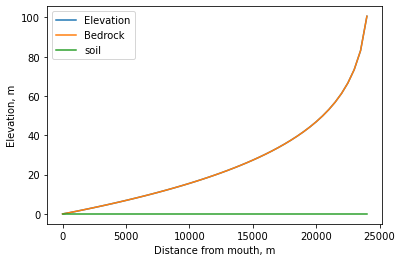

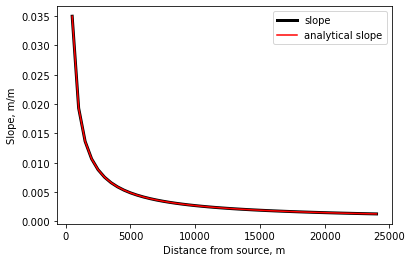

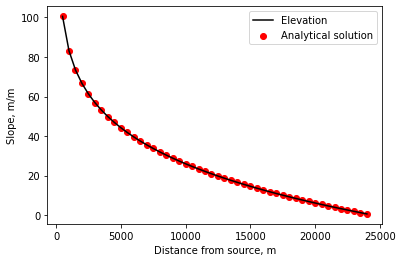

In [4]:
coarse_fraction_from_plucking = 0.0
nr = 3
nc = 50
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 1e-6
transport_coefficient = 0.041
abrasion_coefficient = 0.0
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4


grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
)
plot_model_results(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
)

#### Case 2: plucking where all sediment is preserved (1D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


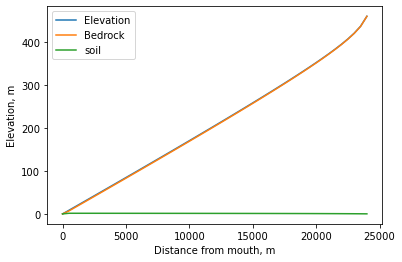

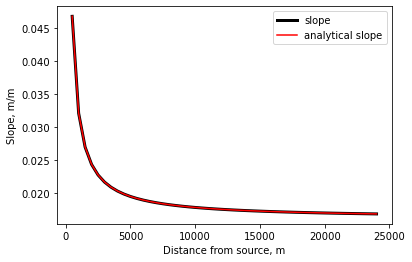

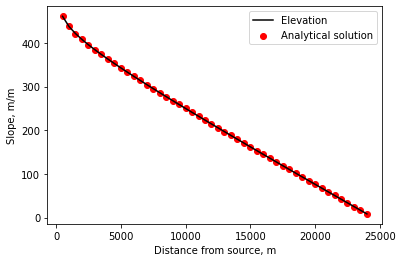

In [5]:
coarse_fraction_from_plucking = 1.0
grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
)

plot_model_results(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
)

### 1.2 Plucking in 2D 

#### Case 1: plucking where all sediment is evacuated as wash load (2D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


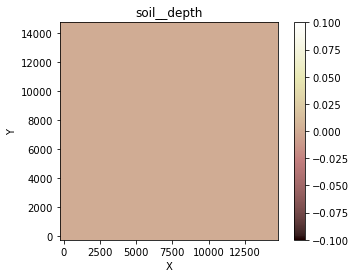

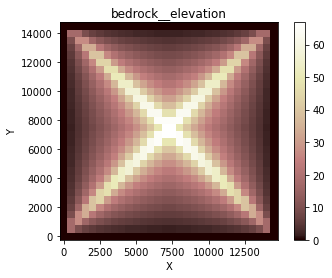

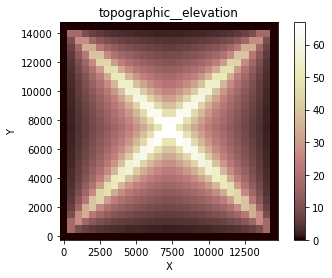

/var/folders/td/c9cs44w55_n07lr946xl3q8w0000gn/T/ipykernel_12511/1832282223.py:142: RuntimeWarning: divide by zero encountered in true_divide
  S_an_2D = (U * dx / (K * A * r)) ** (6 / 7)


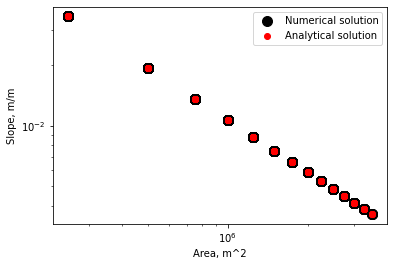

In [6]:
coarse_fraction_from_plucking = 0.0
nr = 30
nc = 30
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 1e-6
transport_coefficient = 0.041
abrasion_coefficient = 0.0
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4


grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
    single_outlet=False,
)
plot_model_results_2D(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
)

#### Case 2: plucking where all sediment is preserved (2D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


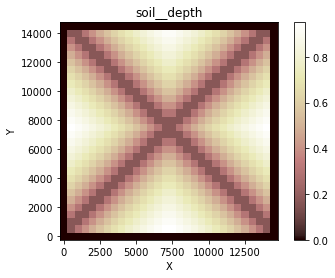

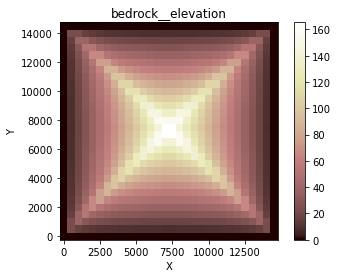

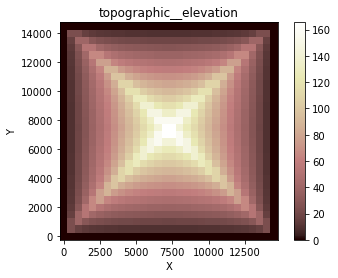

/var/folders/td/c9cs44w55_n07lr946xl3q8w0000gn/T/ipykernel_12511/1832282223.py:144: RuntimeWarning: divide by zero encountered in true_divide
  S_an_2D = (U / r * (1 / ((k_qs * I)) + (dx) / (K * A))) ** (6 / 7)


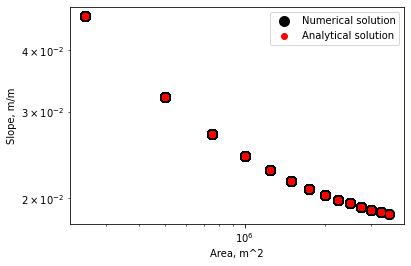

In [7]:
# Run simulation with sediment conservation

coarse_fraction_from_plucking = 1.0
nr = 30
nc = 30
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 1e-6
transport_coefficient = 0.041
abrasion_coefficient = 0.0
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4


grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
    single_outlet=False,
)
plot_model_results_2D(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
)

## 2. Numerical solution sediment transport and abrasion
### Case 1: sediment transport and no abrasion  (1D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


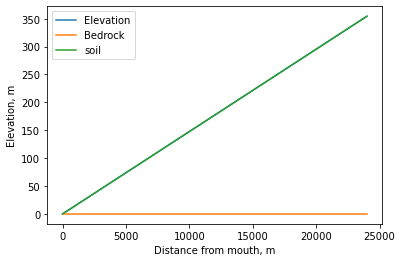

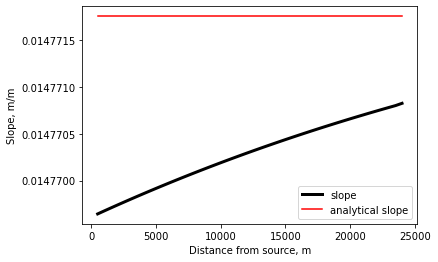

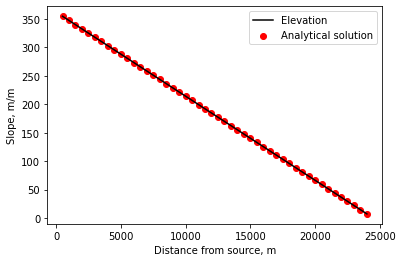

In [8]:
coarse_fraction_from_plucking = 1.0
nr = 3
nc = 50
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 0
transport_coefficient = 0.041
abrasion_coefficient = 0
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4


grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
    uplift ='sediment',
)

plot_model_results(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    analytical_solution="sediment",
    sediment_porosity = 0.1
)




### Case 2: sediment transport and abrasion (1D)

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


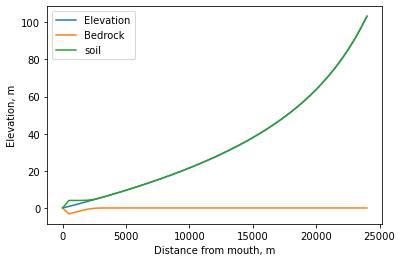

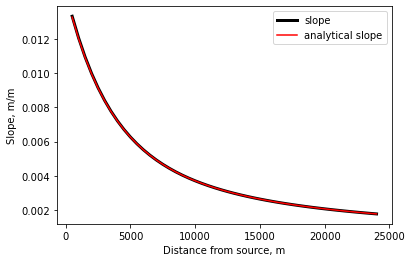

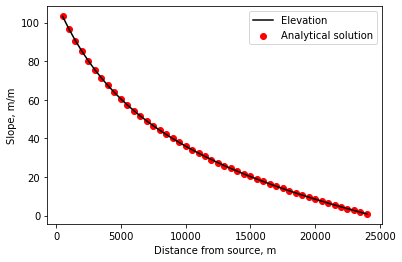

In [9]:
coarse_fraction_from_plucking = 1.0
nr = 3
nc = 50
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 0
transport_coefficient = 0.041
abrasion_coefficient = 1/2000
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4

grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
    uplift ='sediment',
)

plot_model_results(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    analytical_solution="sediment_abrasion",
    sediment_porosity = 0.1
)

## 3. Numerical solution Abrasion and plucking along river profile (1D)

### Case with sediment preservation, plucking and abrasion 

0.00 percent of model run completed
0.25 percent of model run completed
0.50 percent of model run completed
0.75 percent of model run completed


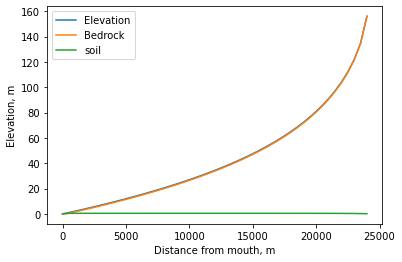

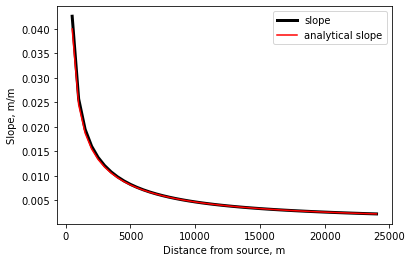

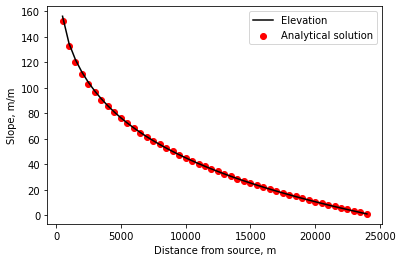

In [10]:
coarse_fraction_from_plucking = 1.0
nr = 3
nc = 50
dx = 500
dt = 500
intermittency_factor = 0.03
runoff_rate = 10.0
plucking_coefficient = 1e-6
transport_coefficient = 0.041
abrasion_coefficient = 1 / 2000
sediment_porosity = 0.1
depth_decay_scale = 0.5
uplift_rate = 1e-4


grid = run_model(
    nr=nr,
    nc=nc,
    dx=dx,
    dt=dt,
    U=uplift_rate,
    coarse_fraction_from_plucking=coarse_fraction_from_plucking,
    intermittency_factor=intermittency_factor,
    runoff_rate=runoff_rate,
    plucking_coefficient=plucking_coefficient,
    transport_coefficient=transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    sediment_porosity=sediment_porosity,
    depth_decay_scale=depth_decay_scale,
)

plot_model_results(
    grid,
    nc,
    uplift_rate,
    coarse_fraction_from_plucking,
    intermittency_factor,
    runoff_rate,
    plucking_coefficient,
    transport_coefficient,
    abrasion_coefficient=abrasion_coefficient,
    analytical_solution="plucking_and_abrasion",
)